# Assignement Module 3

## Sofia Davoli
### 813479


In [1]:
# Libraries

import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import pickle
import matplotlib.patches as mpatches

### FILE READING

Load .nc files, extract ts variable and regrid data of model 2 and 3.
Time series start on 1850-01 up to 2014-12.
The grid for all models (after regridding) has  lat: 143 values,  lon: 144 values.

Load HadCRUT4 observed anomalies
Time series start on 1850-01 up to 2014-12.

In [2]:
########### MODEL 1 ##########

modfile='./CMIP6_data//ts_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc'
m1 = xr.open_dataset(modfile)   #- Open file
ts = m1.ts  #- extract variable (ts)
#print('\n','>>>>>>>>>>>>','\n',ts)

########### MODEL 2 ##########

modfile2='./CMIP6_data//ts_Amon_MRI-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc'
m2 = xr.open_dataset(modfile2)
ts2 = m2.ts  

# Apply regridding
ts2i = ts2.interp(lat=ts.lat, lon=ts.lon, method='linear')
#print('\n','>>>>>>>>>>>>','\n',ts2i)

########### MODEL 3 ##########

modfile3='./CMIP6_data/ts_Amon_MIROC6_historical_r1i1p1f1_gn_185001-194912.nc'
modfile4='./CMIP6_data/ts_Amon_MIROC6_historical_r1i1p1f1_gn_195001-201412.nc'
m3= xr.open_mfdataset([modfile3,modfile4])
ts3 = m3.ts

# Apply regridding
ts3i = ts3.interp(lat=ts.lat, lon=ts.lon, method='linear')
#print('\n','>>>>>>>>>>>>','\n',ts3i)

########### HadCRUT4 anomalies ##########

HadCRUT4_anom= pd.read_pickle("data_anom.pkl")
HadCRUT4_anom_1901=HadCRUT4_anom.loc['1901-01':'2014-12']
#print('\n','>>>>>>>>>>>>','\n', HadCRUT4_anom_1901)

### Extract model ensemble and compute anomalies 


In [3]:
#model ensamble as a mean of the 3 models
ens=(ts+ts2i+ts3i)/3
print(ens)

<xarray.DataArray 'ts' (time: 1980, lat: 143, lon: 144)>
dask.array<truediv, shape=(1980, 143, 144), dtype=float64, chunksize=(1200, 143, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -90.0 -88.73 -87.46 -86.2 ... 86.2 87.46 88.73 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00


In [4]:
#compute anomalies
ref=ens.sel(time=slice('1960-01','1989-12')).mean(dim='time')
ens_anom = ens-ref

C:\Users\davol\anaconda3\envs\geo_env\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


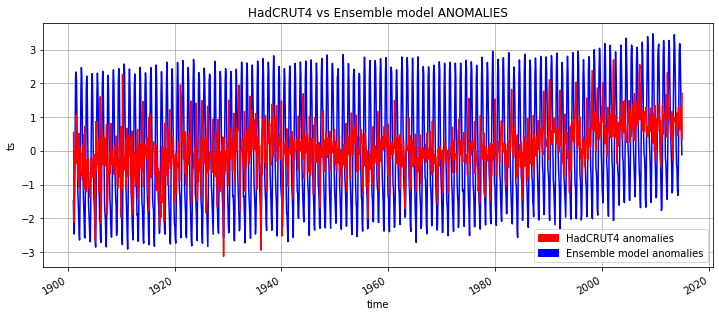

In [5]:
#plot
plt.figure(figsize=(12,5))
plt.xlabel('Number of requests every 10 minutes')

ax1 = ens_anom.sel(time=slice('1901-01', None)).mean(dim=('lat','lon')).plot(color='blue',  label='Ensemble model anomalies')
ax2 = HadCRUT4_anom_1901.mean(axis=1).plot(color='red', grid=True,  label='HadCRUT4 anomalies')

#add legend manually
blue_patch = mpatches.Patch(color='blue', label='Ensemble model anomalies')
red_patch = mpatches.Patch(color='red', label='HadCRUT4 anomalies')
plt.legend(handles=[red_patch, blue_patch])

plt.title('HadCRUT4 vs Ensemble model ANOMALIES')
plt.show()

In [6]:
#get yearly anomalies and resample from 1901

ens_anom_y=ens_anom.sel(time=slice('1901-01', None)).resample(time='Y').mean(dim=('time'))
ens_anom_y.dims, ens_anom_y.shape

HadCRUT4_anom_1901_y = HadCRUT4_anom_1901.groupby(HadCRUT4_anom_1901.index.strftime('%Y')).mean()

(('time', 'lat', 'lon'), (114, 143, 144))

C:\Users\davol\anaconda3\envs\geo_env\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


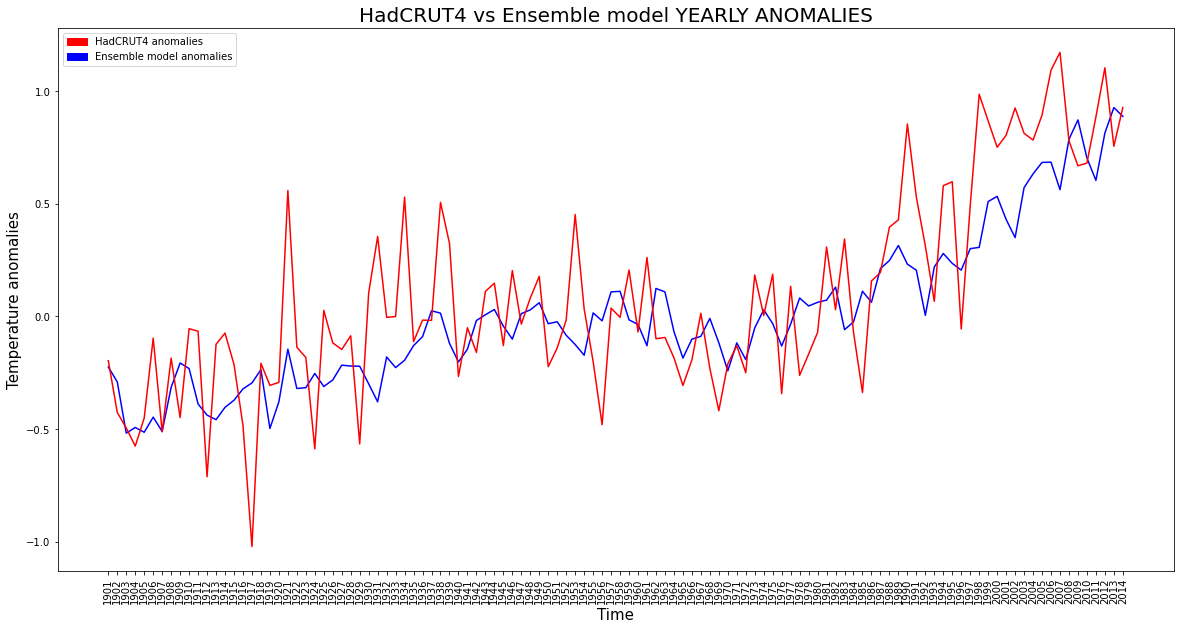

In [9]:
#plot

plt.figure(figsize=(20,10))
plt.xlabel('Time', size=15)
plt.ylabel('Temperature anomalies', size=15)

plt.plot(HadCRUT4_anom_1901_y.index, ens_anom_y.mean(dim=('lat','lon')), color='blue') 
plt.plot(HadCRUT4_anom_1901_y.index, HadCRUT4_anom_1901_y.mean(axis=1),  color='red')

#add legend manually
blue_patch = mpatches.Patch(color='blue', label='Ensemble model anomalies')
red_patch = mpatches.Patch(color='red', label='HadCRUT4 anomalies')
plt.legend(handles=[red_patch, blue_patch])

_ = plt.xticks(rotation=90)
plt.title('HadCRUT4 vs Ensemble model YEARLY ANOMALIES', size=20)
plt.show()